# Metropolis Algorithm - Hopefield Network

Ismael CM
19/12/2022

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [36]:
def read_patern(path='Patern/patern.txt'):
	patern = np.loadtxt(path, delimiter=',', dtype=np.uint8)
	return patern

In [37]:
def patern2point(patern):
	"""Convert a patern (matrix) to a list of points (x,y) where matrix[i][j] == 1
	
	x = j and y = -i + len(patern)

	Explenation:
		j selects the row (vertical movement) and i selects the column (horizontal movement)
		In a plot, x corresponds to the horizontal axis and y to the vertical axis

		Reversing i (i.e. -i) is necessary because the matrix is read from top to bottom. This is the same as reversing the y axis in a plot, so now everything is in the 4th quadrant.
		Adding len(patern) traslates everything to the 1st quadrant.
	"""
	x = []
	y = []
	for i in range(len(patern)): 			# i is the row
		for j in range(len(patern[i])): 	# j is the column
			if patern[i][j] == 1:
				x.append(j) 		    	
				y.append(-i + len(patern)) 
	return x,y

In [38]:
def average(net):
	avg = 0 
	for i in range(len(net)):
		for j in range(len(net[i])):
			avg += net[i][j]

	return avg / (len(net) * len(net[0]))

In [39]:
def interaction(net):
	a = average(net)
	N = len(net)
	w = np.zeros((N, N, N, N)) 		# All zeros 
	for i in range(N):
		for j in range(N):
			for k in range(N):
				for l in range(N):
					if (i != k) and (j != l): 	# so no need to do the case where i,j == k,l
						w[i][j][k][l] = (net[i][j] - a)*(net[k][l] - a)/N**2
						
	return w

In [ ]:
def interaction2(net, N):
	# needs testing
	a = average(net)
	w = np.zeros((N, N, N, N)) 		# All zeros 
	for i in range(1, N):
		for j in range(i, N):
			for k in range(1, N):
				for l in range(k, N):
					if (i, j) != (k, l): 	# so no need to do the case where i,j == k,l
						w[i][j][k][l] = (net[i][j] - a)*(net[k][l] - a)/N**2
						w[k][l][i][j] = w[i][j][k][l]

	return w

In [40]:
def activation(net):
	N = len(net)
	w = interaction(net)
	theta = np.zeros((N, N))
	for i in range(N):
		for j in range(N):
			for k in range(N):
				for l in range(N):
					theta[i][j] += 0.5*w[i][j][k][l]
	return theta 

In [41]:
def difH(i, j, net, omega, theta):
	H = 0 
	N = len(net)
	for k in range(N):
		for l in range(N):
			if (k != i) and (l != j):
				H += omega[i][j][k][l]*net[i][j]

	H = (2*net[i][j]-1)*(H - theta[i][j]) 

	return H 


In [ ]:
def Hamilt(net, omega, theta):
	H = 0 
	N = len(net)
	for i in range(N):
		for j in range(N):
			H += theta[i][j]*net[i][j]
			for k in range(N):
				for l in range(N):
					H += -0.5*omega[i][j][k][l]*net[i][j]*net[k][l]
	return H

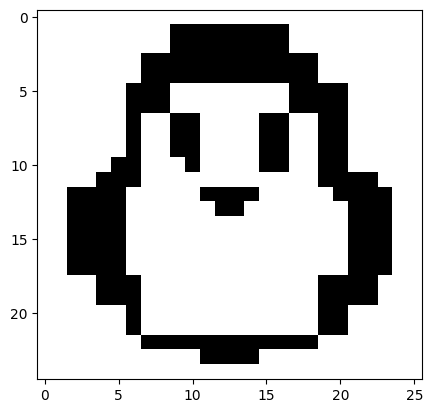

In [47]:
skull = read_patern("patern/skull.txt")
peng = read_patern("patern/peng.txt")
# x, y = patern2point(skull)
# plt.imshow(skull, cmap='binary')
# plt.scatter(x, y, s=50, c='k')
plt.imshow(peng, cmap='binary')
plt.show()

In [48]:
# Learning fase
omega = interaction(peng)
theta = activation(peng)

In [49]:
# Active fase
N = len(peng)
net = np.zeros((N, N), dtype=np.uint8)
# net = skull.copy()
pMC = 15
T = 0.0001
for k in range(pMC*N*N):
	if k%(N*N) == 0:
		# Plot
		plt.figure()
		plt.imshow(net, cmap='binary')
		plt.title(f"pMC = {k+1}")
		plt.savefig(f"Plot/pMC{k+1}.png")
		plt.close()
	
		print(f"Paso MoneteCarlo {k+1}")
	aux_i = random.randint(0, N-1)
	aux_j = random.randint(0, N-1)
	
	H = difH(aux_i, aux_j, net, omega, theta)
	p = np.exp(-H/T)
	if random.random() < p:
		net[aux_i][aux_j] = 1 - net[aux_i][aux_j]

Paso MoneteCarlo 1


TypeError: 'int' object is not subscriptable

In [45]:
for i in range(10):
	aux = [random.randint(0, 10) for _ in range(10)]
	print(np.random.random())
	print(aux)

0.04202785241830986
[6, 6, 4, 7, 0, 9, 8, 7, 5, 4]
0.7102585366633656
[6, 1, 10, 2, 10, 1, 8, 10, 7, 2]
0.5841075238545702
[1, 5, 1, 10, 1, 1, 10, 3, 4, 3]
0.44716933740766385
[3, 0, 9, 2, 4, 2, 9, 1, 10, 9]
0.10913049215492232
[1, 1, 4, 3, 4, 8, 0, 3, 7, 3]
0.6413400149921838
[2, 5, 7, 6, 9, 8, 1, 8, 7, 6]
0.9321761250308706
[6, 8, 8, 10, 2, 4, 9, 5, 1, 2]
0.031979197920211755
[0, 4, 3, 7, 2, 1, 1, 3, 9, 5]
0.5921688945860291
[8, 1, 7, 7, 7, 2, 6, 3, 6, 7]
0.7892149943979092
[4, 8, 0, 0, 2, 3, 10, 7, 5, 1]
